In [ ]:
                        """  https://github.com/Shivam1795  """

In [1]:
## import all the required libraries ##
import random
import preprocessing
import matplotlib.pyplot as plt

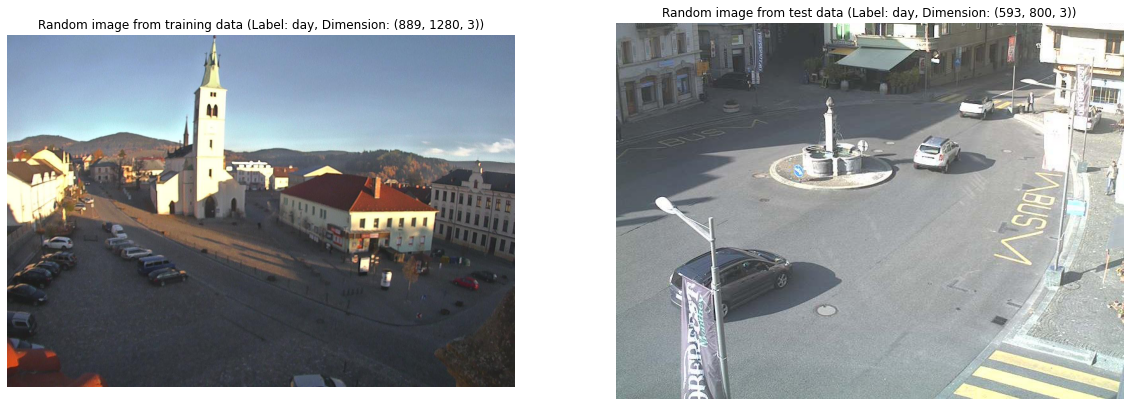

In [2]:
## Load Data ##

## Specify path for the testing and training dataset !!
training_data_path = 'day_night_images/training/'
test_data_path = 'day_night_images/test/'

## Loading data !!
training_data = preprocessing.dataloder(training_data_path)
test_data = preprocessing.dataloder(test_data_path)

## Data visualization !!
preprocessing.Data_Visualization(training_data, test_data)

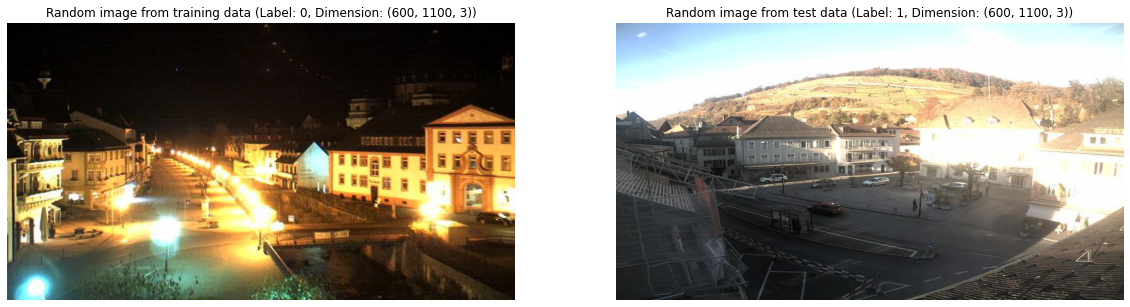

In [3]:
## Data Standardization ##

## Set a standard size for all the images !! 
Standard_image_size = (1100, 600)

## Perform standarization operation on training and test data !!
standard_training_data = preprocessing.data_standardize(training_data, Standard_image_size)
standard_test_data = preprocessing.data_standardize(test_data, Standard_image_size)

## Shuffel standard training and standard test data !!
random.shuffle(standard_training_data); random.shuffle(standard_test_data)

## Data visualization !!
preprocessing.Data_Visualization(standard_training_data, standard_test_data)

In [4]:
## Use simple Thresholding for classification ##

def estimate_label(rgb_image):
    """
        Function predicts the label of the input image using average brightness as a feature.
        
        Input:
            rgb_image: Single RGB image.
    """
    
    ## Initialize a variable to store predicted label (assigned 0 to assume by default label is 'Night') !!
    predicted_label = 0
    
    ## Define a threshold !!
    threshold = 99
    
    ## Extrect average brightness feature from a rgb image !!
    avg_brightness = preprocessing.get_features(rgb_image)
    
    ## if average brightness is grater then threshold, it's a day image !!
    if avg_brightness > threshold:
        predicted_label = 1
        
    return predicted_label

In [5]:
def get_misclassified_images(data_list):
    
    """
        This function compares the true and the predicted label of each image and returns 
        a list of all misclassified images along with true and predicted labels.
        
        Input:
            data_list: Standardized test data in the form of a list of images and labels.
        
    """
    
    ## Initialize an empty list to store misclassified images, true labels, and predicted labels !!
    misclassified_images = []
    
    ## Iterate over all the images to get the misclassified images !!
    for data in data_list:
        
        ## Load image and true label !!
        image = data[0]
        true_label = data[1]
        
        ## Estimate the labels !!
        predicted_label = estimate_label(image)
        
        ## Append misclassified images, true labels, and predicted labels to a list !!
        if predicted_label != true_label:
            misclassified_images.append((image, true_label, predicted_label))
            
    return misclassified_images

In [6]:
## Get all the misclassified images in the test data !!
misclassified_data = get_misclassified_images(standard_test_data)

## Calculate accuracy !!
total_images = len(standard_test_data)
correct_images = total_images - len(misclassified_data)
Accuracy = correct_images/total_images

## Print accuracy !!
print('Accuracy =', Accuracy)
print('Total misclassified images = {} out of {}'.format(len(misclassified_data), total_images))

Accuracy = 0.9375
Total misclassified images = 10 out of 160


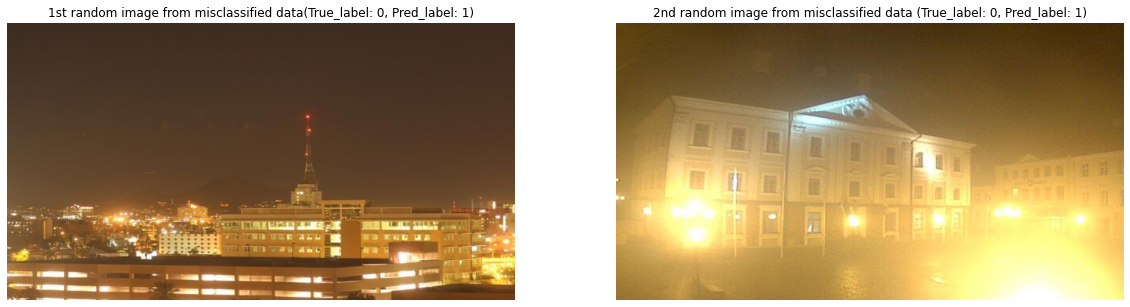

In [7]:
## Visulize misclassified images ##

## Initialize subplots !!
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

## Select a random index (integer) for training data !!
random_index1 = random.randint(0, len(misclassified_data)-1)
random_index2 = random.randint(0, len(misclassified_data)-1)

## Load random image and labels from misclassified data !!
image = misclassified_data[random_index1][0]
true_label = misclassified_data[random_index1][1]
pred_label = misclassified_data[random_index1][2]

##Display image !!
ax1.imshow(image)
ax1.set_title('1st random image from misclassified data(True_label: {}, Pred_label: {})'.format(true_label, pred_label))
ax1.axis(False)

## Load random image and labels from misclassified data !!
image = misclassified_data[random_index2][0]
true_label = misclassified_data[random_index2][1]
pred_label = misclassified_data[random_index2][2]

## Display image !!
ax2.imshow(image)
ax2.axis(False)
ax2.set_title('2nd random image from misclassified data (True_label: {}, Pred_label: {})'.format(true_label, pred_label));